In [1]:
%matplotlib inline
import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/earneodo/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/earneodo/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


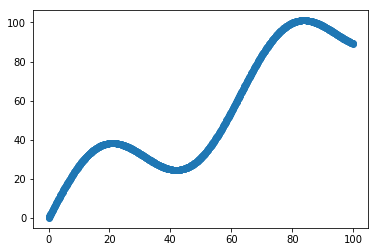

In [2]:
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)
plt.scatter(X_data, y_data)

In [3]:
n_samples = 1000
batch_size = 100
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))
 

In [4]:
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1, 1),
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("bias", (1,),
                    initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum(tf.square(y - y_pred)/n_samples)

#the gradient descent
opt = tf.train.AdamOptimizer(learning_rate=1E-5)
opt_operation = opt.minimize(loss)

In [5]:
loss_vals = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(15000):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
        loss_vals.append(loss_val)
        
    # make predictions for the last batch    
    yp = sess.run([y_pred], feed_dict={X: X_batch, y: y_batch})

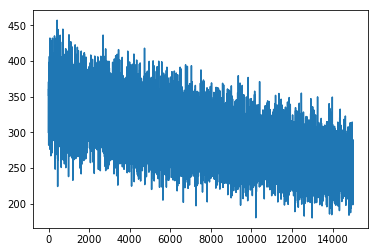

In [6]:
plt.plot(loss_vals)

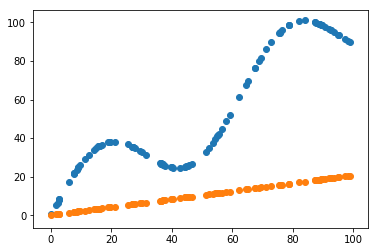

In [7]:
plt.scatter(X_batch, y_batch)
plt.scatter(X_batch, yp)

In [8]:
tf.train.AdamOptimizer?